In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/brianoktavec/MSC550/Assignment_6/Expend.csv')

In [3]:
df.head()

,EX,ECAB,MET,GROW,YOUNG,OLD,WEST,STATE
0,256,85.5,19.7,6.9,29.6,11.0,0,ME
1,275,94.3,17.7,14.7,26.4,11.2,0,NH
2,327,87.0,0.0,3.7,28.5,11.2,0,VT
3,297,107.5,85.2,10.2,25.1,11.1,0,MA
4,256,94.9,86.2,1.0,25.3,10.4,0,RI


In [4]:
len(df)

48

# #1

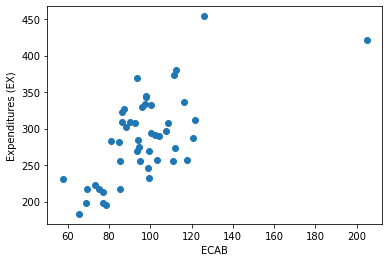

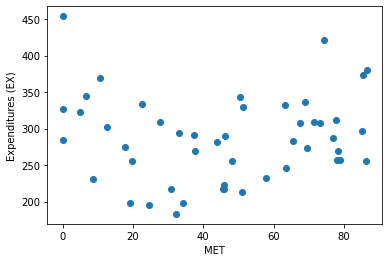

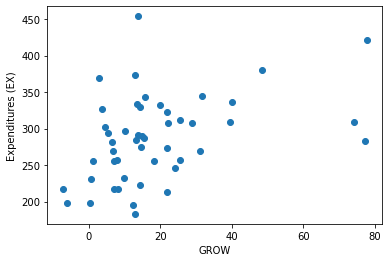

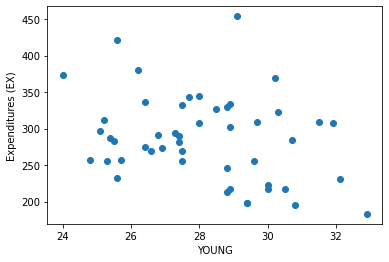

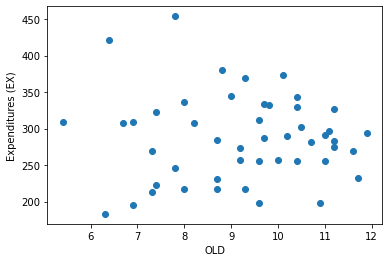

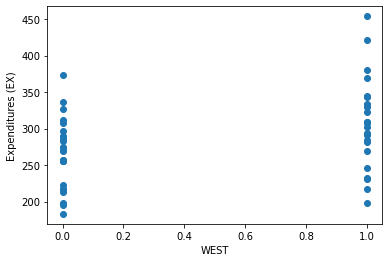

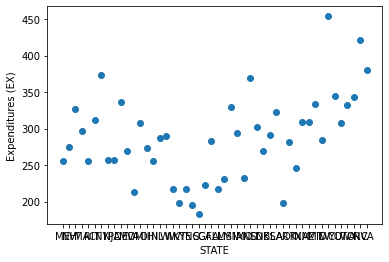

In [5]:
var = ['ECAB', 'MET', 'GROW', 'YOUNG', 'OLD', 'WEST', 'STATE']

for x in var:
    plt.scatter(df[x], df['EX'])
    plt.xlabel(x)
    plt.ylabel('Expenditures (EX)')
    plt.show()

# #2

In [6]:
import statsmodels.api as sm
ols = sm.OLS(df.EX, sm.add_constant(df.iloc[:, 1:7]))
lm = ols.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     10.22
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           6.63e-07
Time:                        17:27:10   Log-Likelihood:                -241.20
No. Observations:                  48   AIC:                             496.4
Df Residuals:                      41   BIC:                             509.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.1818    306.486      1.162      0.2

Text(0, 0.5, 'Residuals')

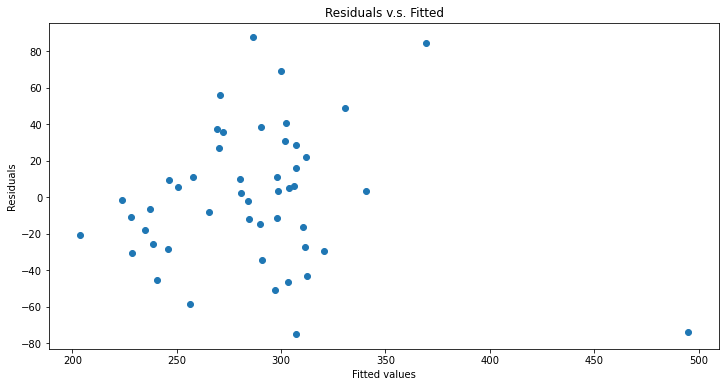

In [7]:
fitted_y = lm.fittedvalues
residual = lm.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Text(0, 0.5, 'Frequency')

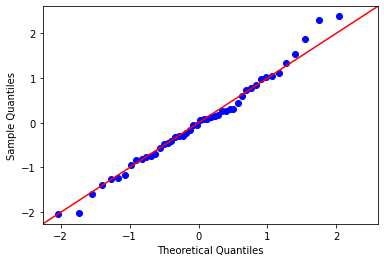

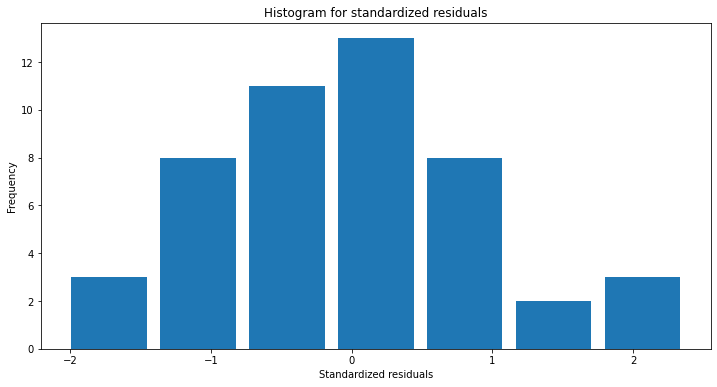

In [8]:
from sklearn.preprocessing import scale
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

In [9]:
from scipy import stats
from scipy.stats import kstest
print(stats.shapiro(residual))
print(kstest(residual, 'norm'))

ShapiroResult(statistic=0.9858032464981079, pvalue=0.8232166171073914)
KstestResult(statistic=0.4868345638509053, pvalue=5.267109674550464e-11)


In [10]:
df[abs(residual_norm) > 1]

,EX,ECAB,MET,GROW,YOUNG,OLD,WEST,STATE
2,327,87.0,0.0,3.7,28.5,11.2,0,VT
6,374,111.5,85.5,12.9,24.0,10.1,0,NY
7,257,117.9,78.9,25.5,24.8,9.2,0,NJ
20,195,78.7,24.6,12.4,30.8,6.9,0,NC
26,329,95.7,51.3,14.4,28.8,10.4,1,MN
28,232,99.1,57.9,9.8,25.6,11.7,1,MO
29,369,93.4,10.6,2.9,30.2,9.3,1,ND
31,269,99.1,37.6,6.8,26.6,11.6,1,NB
34,198,68.6,19.1,-6.2,29.4,10.9,1,AR
36,246,98.8,63.4,24.1,28.8,7.8,1,TX


In [11]:
df1 = df[abs(residual_norm) <= 1]

In [20]:
ols = sm.OLS(df1.EX, sm.add_constant(df1.iloc[:, 1:7]))
lm1 = ols.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     22.86
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           3.26e-09
Time:                        17:33:05   Log-Likelihood:                -140.17
No. Observations:                  33   AIC:                             294.3
Df Residuals:                      26   BIC:                             304.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        323.4514    199.630      1.620      0.1

Text(0, 0.5, 'Frequency')

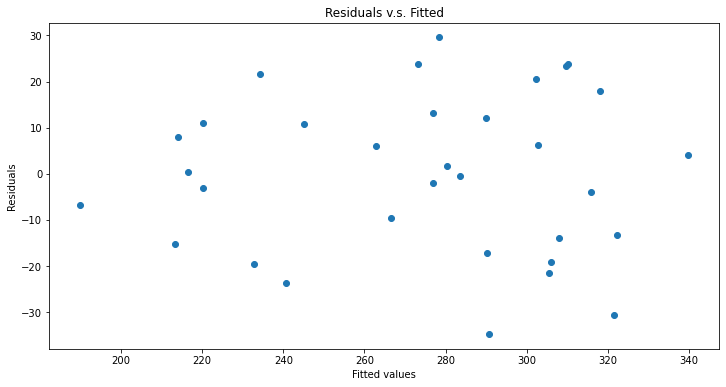

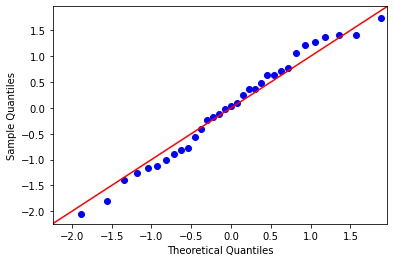

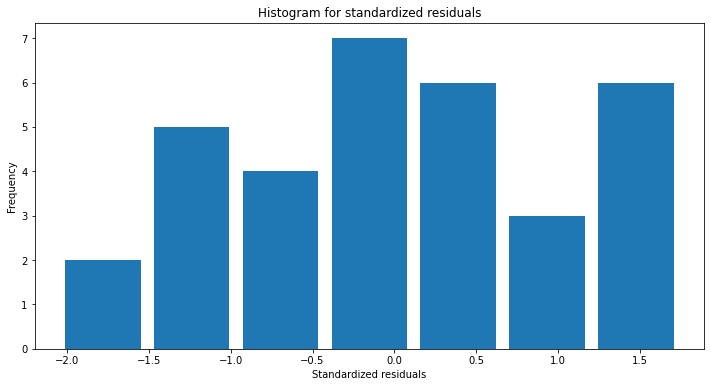

In [21]:
fitted_y = lm1.fittedvalues
residual = lm1.resid
plt.figure(figsize=(12,6))
plt.scatter(fitted_y,residual)
plt.title('Residuals v.s. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
residual_norm = scale(residual)
sm.qqplot(residual_norm, line='45')
plt.figure(figsize=(12,6))
plt.hist(x=residual_norm, bins='auto', rwidth=0.85)
plt.title('Histogram for standardized residuals')
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')

# #3

Text(0, 0.5, 'Cooks distance')

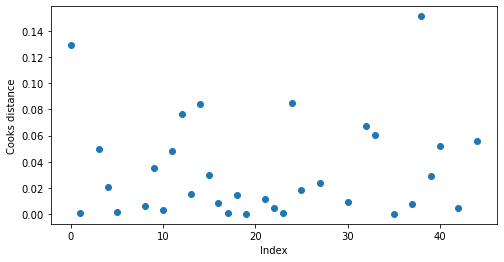

In [23]:
cooks = lm1.get_influence().cooks_distance[0]
df1[cooks > 1]
plt.figure(figsize=(8,4))
plt.scatter(df1.index, cooks)
plt.xlabel('Index')
plt.ylabel('Cooks distance')

# #4

Text(0, 0.5, 'Leverage')

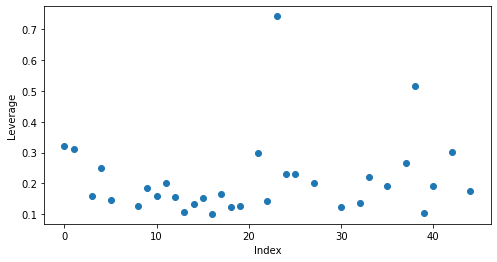

In [41]:
leverage = lm1.get_influence().hat_matrix_diag
df1[leverage > 2*len(lm.params)/df1.shape[0]]
plt.figure(figsize=(8,4))
plt.scatter(df1.index, leverage)
plt.xlabel('Index')
plt.ylabel('Leverage')

In [44]:
influence = lm1.get_influence()
leverage = influence.hat_matrix_diag

avg = np.mean(leverage)
threshold = 2 * avg

high = np.where(leverage > threshold)[0]

In [45]:
print(high)

[19 28]


In [126]:

cook = influence.cooks_distance[0]

threshold = 4 / (len(df1) - (len(df1.columns)-1) - 1) 
highCook = np.where(cook > threshold)[0]

In [127]:
print(highCook)

[]


In [128]:
influentialPoints = np.intersect1d(high, highCook)
print(influentialPoints)

[]


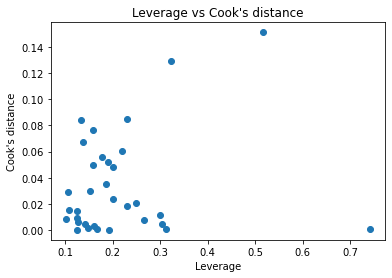

In [129]:
plt.scatter(leverage, cook)
plt.xlabel('Leverage')
plt.ylabel("Cook's distance")
plt.title("Leverage vs Cook's distance")
plt.show()

In [130]:
df2 = df1.drop(df1.index[highCook])

In [131]:
import statsmodels.api as sm
ols = sm.OLS(df2.EX, sm.add_constant(df2.iloc[:, 1:7]))
lm3 = ols.fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     22.86
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           3.26e-09
Time:                        18:14:28   Log-Likelihood:                -140.17
No. Observations:                  33   AIC:                             294.3
Df Residuals:                      26   BIC:                             304.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        323.4514    199.630      1.620      0.1